# Lab 2 - Probabilities, Distributions, and Statistical Questions
## William Olsen, partners with Jennifer Vo

In this lab we will become more familiar with probabilities, distributions, and statistical questions

In [1]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

For this problem lets consider that we are looking for gamma-ray sources.  These sources are being detected by a telescope pointed off into space.  In outer space we have the cosmic background radiation which will be the background distribution for our telescope which we are using to detect gamma-ray sources.  This cosmic background happens to be modeled by precisely the Poisson distribution.  Now we would like to ask the following question regarding our background gamma-ray sources:

> What is the probability that cosmic-ray background produced a signal as signal-like or more than our candidate signal?

For this problem we will assume that in a single day the average number of background cosmic-rays is 2.7 while the average number of gamma-rays is emitted by our hypothetical source is 4.1.

### Part A

Let us first observe how the probability distribution of the background varies as we integrate (or sum) for more days.  We will observe the resulting distributions after 0, 1, 2, 3, and 4 convolutions with itself which corresponds to summing the distribution over 1, 2, 3, 4, and 5 days respectively.

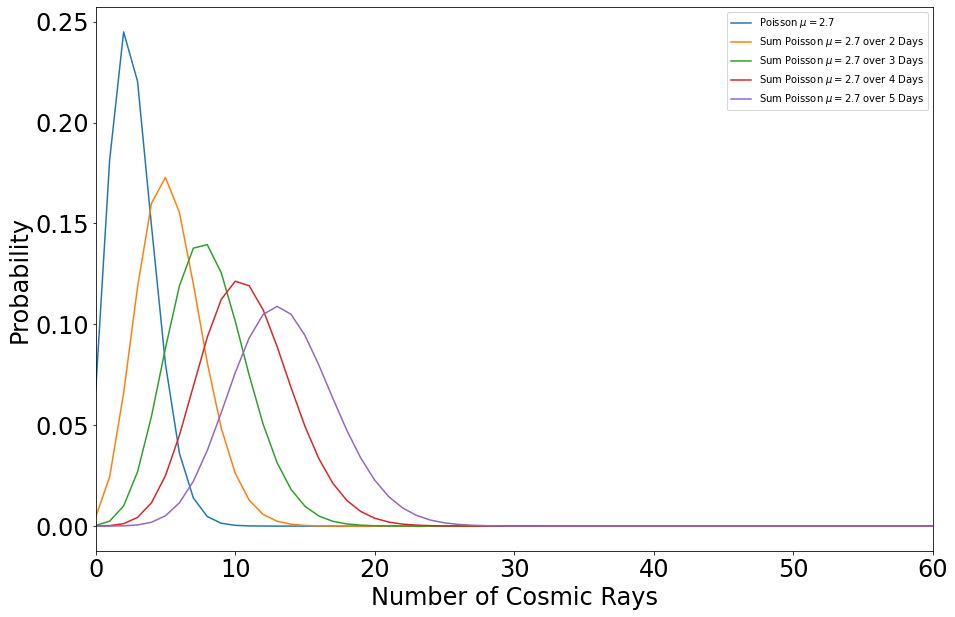

In [2]:
# define our parameters
gr_rate = 4.1 # gamma rays per day
cr_rate = 2.7 # cosmic rays per day

xs_0_conv = np.linspace(0, 60, 61)
probs_0_conv = stats.poisson.pmf(xs_0_conv, cr_rate)
plt.plot(xs_0_conv, probs_0_conv, label=f'Poisson $\mu={cr_rate}$')

probs_1_conv = np.convolve(probs_0_conv, probs_0_conv)
xs_1_conv = np.linspace(0, len(probs_1_conv)-1, len(probs_1_conv))
plt.plot(xs_1_conv, probs_1_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 2 Days')

probs_2_conv = np.convolve(probs_1_conv, probs_0_conv)
xs_2_conv = np.linspace(0, len(probs_2_conv)-1, len(probs_2_conv))
plt.plot(xs_2_conv, probs_2_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 3 Days')

probs_3_conv = np.convolve(probs_2_conv, probs_0_conv)
xs_3_conv = np.linspace(0, len(probs_3_conv)-1, len(probs_3_conv))
plt.plot(xs_3_conv, probs_3_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 4 Days')

probs_4_conv = np.convolve(probs_3_conv, probs_0_conv)
xs_4_conv = np.linspace(0, len(probs_4_conv)-1, len(probs_4_conv))
plt.plot(xs_4_conv, probs_4_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 5 Days')

plt.tick_params(labelsize=24)
plt.xlim(0, 60)
plt.ylabel('Probability', fontdict={'size':24})
plt.xlabel('Number of Cosmic Rays', fontdict={'size':24})
plt.legend()
plt.show()

From the resulting graph above we see that as we sum across more days our probabilities spread out over a larger range of the domain.  In addition, we see that the peak of our distribution shifts to the right as we sum over more days and the width of our distribution increases.  Comparing to the Gaussian it is not surprising that the Poisson's width increases as we average more distributions together as this is the same behavior that we see with the Gaussian.  This is because as we sum, values around the average value become more common thus increasing the width of the distribution.

### Part B

To see if the distribution is still Poisson after averaging over 5 days we will plot the summed distribution on the semi-log scale and compare it to a classic Poisson over just one day.

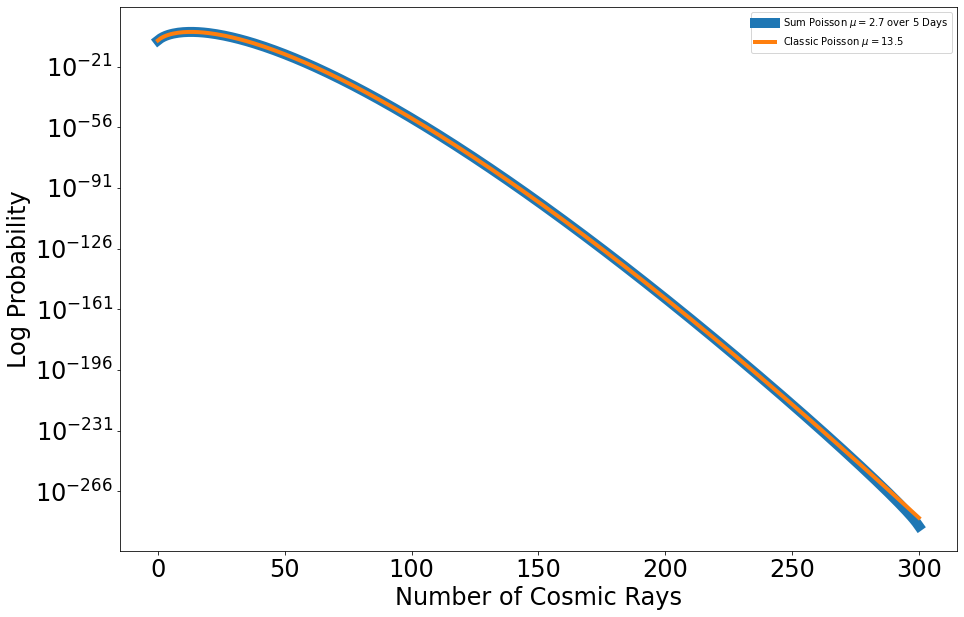

In [3]:
plt.plot(xs_4_conv, probs_4_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 5 Days', linewidth=10)

xs_semi_log = np.linspace(0, xs_4_conv[-1], len(xs_4_conv))
probs_semi_log = stats.poisson.pmf(xs_semi_log, cr_rate * 5)
plt.plot(xs_semi_log, probs_semi_log, label=f'Classic Poisson $\mu={cr_rate*5}$', linewidth=4)

plt.tick_params(labelsize=24)
plt.yscale('log')
plt.ylabel('Log Probability', fontdict={'size':24})
plt.xlabel('Number of Cosmic Rays', fontdict={'size':24})
plt.legend()
plt.show()

From the above we see that as we average over more days we still have a Poisson distribution however the parameter of that distribution is changing by a factor of $N$ where $N$ is the number of days over which we are summing.  However numerically we see that we still have a Poisson distribution.  Conceptually this is to expectation because the original Poisson distribution has discrete values that occur in fixed intervals of time.  When we sum we are taking distributions that have events that occur at specific points in time and sum them thus resulting in an event with a larger value that occurs after more time has passed.  However this is still an event that occurs after some amount of time which maps back to a Poisson distribution.  However we do see that near the tail the sum distribution is beginning to diverge from the a standard Poisson distribution but only slightly.

Mathematically we can prove that the sum of Poisson distributions is still a Poisson because of the reasoning outlined above.  Say we have a random variable $X$ which is a Poisson random variable, thus we have a probability distribution function that follows the following equation: 

$$P(X=k) = \frac{\lambda^k}{k!} e^{-\lambda}$$

Now if we sum $X_1,...,X_N$ which are all Poisson distributions we can see that because $X_1,...,X_N$ are all integer valued their sum will be too.  This satisfies the first requirement of a Poisson distribution - to only accept integer values.  Next because all of these random variables are Poisson random variables, they will produce probabilities from the Poisson distribution which results in their sum distribution also producing probabilities from the Poisson distribution.

### Part C

Now we will observe how the Poisson distribution changes as we average days.  Let us first visualize the same day ranges as we did previously for the sum but for the average.

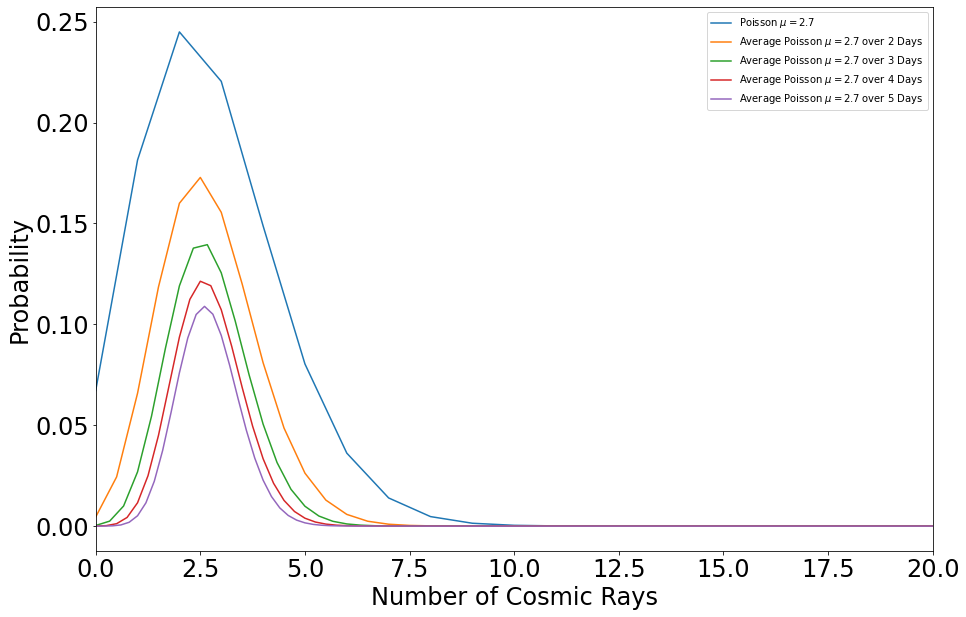

In [4]:
xs_0_conv_avg = xs_0_conv
plt.plot(xs_0_conv_avg, probs_0_conv, label=f'Poisson $\mu={cr_rate}$')

xs_1_conv_avg = xs_1_conv / 2
plt.plot(xs_1_conv_avg, probs_1_conv, label=f'Average Poisson $\mu={cr_rate}$ over 2 Days')

xs_2_conv_avg = xs_2_conv / 3
plt.plot(xs_2_conv_avg, probs_2_conv, label=f'Average Poisson $\mu={cr_rate}$ over 3 Days')

xs_3_conv_avg = xs_3_conv / 4
plt.plot(xs_3_conv_avg, probs_3_conv, label=f'Average Poisson $\mu={cr_rate}$ over 4 Days')

xs_4_conv_avg = xs_4_conv / 5
plt.plot(xs_4_conv_avg, probs_4_conv, label=f'Average Poisson $\mu={cr_rate}$ over 5 Days')

plt.tick_params(labelsize=24)
plt.xlim(0, 20)
plt.ylabel('Probability', fontdict={'size':24})
plt.xlabel('Number of Cosmic Rays', fontdict={'size':24})
plt.legend()
plt.show()

From the above plots we see that while the location of the peak for each average distribution stays the same, the amplitude of the peak decreases as we average over more days.  Additionally we see that the standard deviation decreases as we average over more days.  This is to be expected because if we are averaging the results from 5 different days than the events further from the mean will become less likely as for them to occur they must occur on all 5 days - and they were already low probability events to begin with.  This is also why we see the probability of the center value decrease because to achieve that value, all of the distributions must produce that value which has a lower probability than just one distribution producing it.

Now to get a better idea of the resulting distribution we will view the result of averaging 5 days on a semi-log plot.

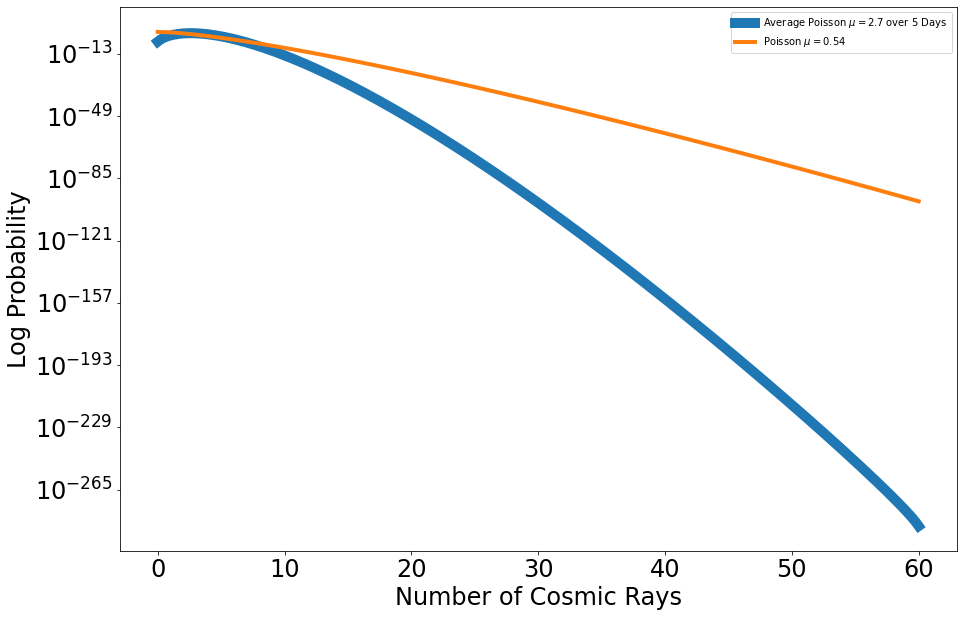

In [5]:
plt.plot(xs_4_conv_avg, probs_4_conv, label=f'Average Poisson $\mu={cr_rate}$ over 5 Days', linewidth=10)

xs_semi_log_avg = np.linspace(0, 60, 61)
probs_semi_log_avg = stats.poisson.pmf(xs_semi_log_avg, cr_rate / 5)
plt.plot(xs_semi_log_avg, probs_semi_log_avg, label=f'Poisson $\mu={cr_rate / 5}$', linewidth=4)

plt.tick_params(labelsize=24)
plt.yscale('log')
plt.ylabel('Log Probability', fontdict={'size':24})
plt.xlabel('Number of Cosmic Rays', fontdict={'size':24})
plt.legend()
plt.show()

From the view on a semi-log plot we see that the average result is beginning to diverge from the standard Poisson distribution with an equivalent standard deviation as the averaged distribution seen in blue.  This is opposite to what we saw with the sum distribution in the previous part as that distribution still resembled a Poisson distribution.

If we were to continue this process our average poisson distribution would eventually converge to, approximately, a Gaussian distribution.  This result is exactly the central limit in action and we see it with the average of Poisson distributions.  This is not a surprise as when we begin to average - as opposed to summing - we are now mapping into the real values rather than being stuck with discrete values.

### Part D

Let's suppose that over a range of 4 days we saw $4*4.1=16.4$ gamma rays.  We would like to determine the probability that this was due to the background distribution.  We will ask the following question:

> What is the probability that the background distribution of the sum of a Poisson distribution over 4 days, with a parameter of 5.2 cosmic-rays/day, produces a signal that is as signal-like or more than my candidate of 16.4 gamma rays?

Mathematically, we can represent this question as the following:

$$\text{Probability}=\int_{16.4}^\infty \text{pdf}_{\text{5 day sum Poisson}}(x)dx$$

In [6]:
# lets define our canidate
canidate = 4 * gr_rate

# we must evaluate the CDF using a reiman sum
# first we will compute the bin side
poisson_4_days_bin_width = xs_3_conv[-1] / len(xs_3_conv)

# now we can evaluate the reiman sum
area_under_4_day_curve = 0
i = 0
for probability in probs_3_conv:
    if xs_3_conv[i] >= canidate:
        area_under_4_day_curve += poisson_4_days_bin_width * probability
    i+=1
        
# now that we have the area under the curve let's convert that value to a sigma
sigma_4_days = stats.norm.ppf(area_under_4_day_curve)
sigma_4_days = abs(sigma_4_days) # can take positive value due to symmetry

# print results
print(f'Provided we have a canidate value of {canidate} gamma rays / day, the probability')
print(f'this is caused by the background is {area_under_4_day_curve} which corresponds to')
print(f'a sigma value of {sigma_4_days:.3f}')

Provided we have a canidate value of 16.4 gamma rays / day, the probability
this is caused by the background is 0.04871512514891056 which corresponds to
a sigma value of 1.657


From the above computation we found that it is _very_ likely that an observation of $16.4$ gamma rays would be due to the background distribution.  Our results were that this has a sigma of $1.657\sigma$ to be caused by the background which is equivalent to a probability of $0.0487$.

## Problem 2

Let us now presume that we have a Rayleigh distribution as our background distribution.  This distribution is considered a skewed distribution when compared to a Gaussian.  Let's look at how this distribution behaves as we average over more observing intervals.  Additionally, we will see how this distribution behaves over a large amount of intervals, specifically seeing if the central limit theorem is applicable.

### Part A

Let's observe how the distribution changes as we average over more observing intervals when our distribution is a Rayleigh.  We will be using a base Rayleigh with $\sigma=1$

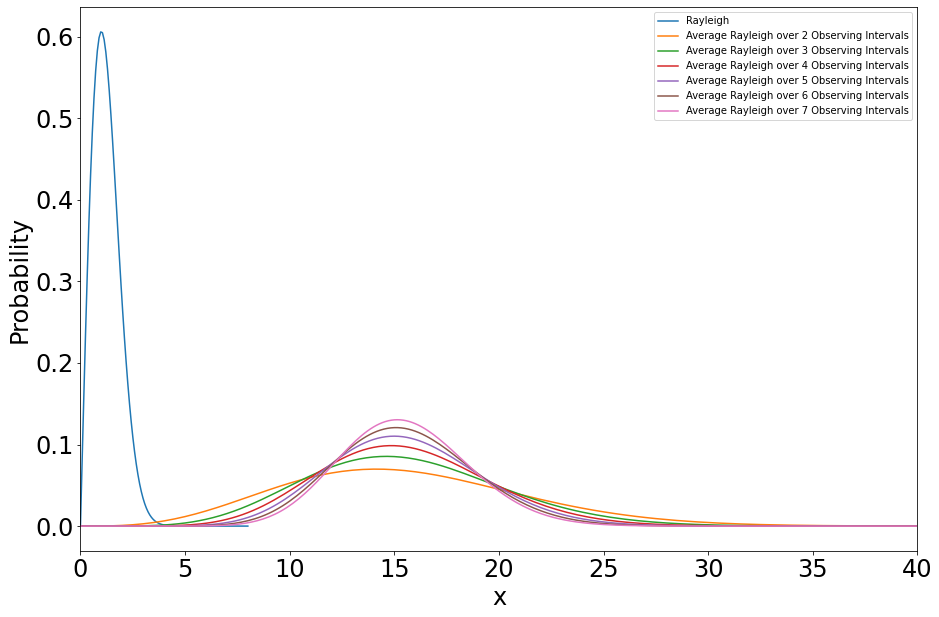

In [7]:
def normalizer(x, y):
    return np.sum(y) * calc_bin_width(x)

def calc_bin_width(x):
    return (x[-1] - x[0]) / len(x)

# define our parameters
xs_0_conv_ray_avg = np.linspace(0, 8, 100)
probs_0_conv_ray_avg = stats.rayleigh.pdf(xs_0_conv_ray_avg)

probs_1_conv_ray_avg = np.convolve(probs_0_conv_ray_avg, probs_0_conv_ray_avg)
xs_1_conv_ray_avg = np.linspace(0, len(probs_1_conv_ray_avg)-1, len(probs_1_conv_ray_avg)) / 2

probs_2_conv_ray_avg = np.convolve(probs_1_conv_ray_avg, probs_0_conv_ray_avg)
xs_2_conv_ray_avg = np.linspace(0, len(probs_2_conv_ray_avg)-1, len(probs_2_conv_ray_avg)) / 3

probs_3_conv_ray_avg = np.convolve(probs_2_conv_ray_avg, probs_0_conv_ray_avg)
xs_3_conv_ray_avg = np.linspace(0, len(probs_3_conv_ray_avg)-1, len(probs_3_conv_ray_avg)) / 4

probs_4_conv_ray_avg = np.convolve(probs_3_conv_ray_avg, probs_0_conv_ray_avg)
xs_4_conv_ray_avg = np.linspace(0, len(probs_4_conv_ray_avg)-1, len(probs_4_conv_ray_avg)) / 5

probs_5_conv_ray_avg = np.convolve(probs_4_conv_ray_avg, probs_0_conv_ray_avg)
xs_5_conv_ray_avg = np.linspace(0, len(probs_5_conv_ray_avg)-1, len(probs_5_conv_ray_avg)) / 6

probs_6_conv_ray_avg = np.convolve(probs_5_conv_ray_avg, probs_0_conv_ray_avg)
xs_6_conv_ray_avg = np.linspace(0, len(probs_6_conv_ray_avg)-1, len(probs_6_conv_ray_avg)) / 7

# normalize using the bin width
probs_1_conv_ray_avg /= normalizer(xs_1_conv_ray_avg, probs_1_conv_ray_avg)
probs_2_conv_ray_avg /= normalizer(xs_2_conv_ray_avg, probs_2_conv_ray_avg)
probs_3_conv_ray_avg /= normalizer(xs_3_conv_ray_avg, probs_3_conv_ray_avg)
probs_4_conv_ray_avg /= normalizer(xs_4_conv_ray_avg, probs_4_conv_ray_avg)
probs_5_conv_ray_avg /= normalizer(xs_5_conv_ray_avg, probs_5_conv_ray_avg)
probs_6_conv_ray_avg /= normalizer(xs_6_conv_ray_avg, probs_6_conv_ray_avg)

# plot
plt.plot(xs_0_conv_ray_avg, probs_0_conv_ray_avg, label=f'Rayleigh')
plt.plot(xs_1_conv_ray_avg, probs_1_conv_ray_avg, label=f'Average Rayleigh over 2 Observing Intervals')
plt.plot(xs_2_conv_ray_avg, probs_2_conv_ray_avg, label=f'Average Rayleigh over 3 Observing Intervals')
plt.plot(xs_3_conv_ray_avg, probs_3_conv_ray_avg, label=f'Average Rayleigh over 4 Observing Intervals')
plt.plot(xs_4_conv_ray_avg, probs_4_conv_ray_avg, label=f'Average Rayleigh over 5 Observing Intervals')
plt.plot(xs_5_conv_ray_avg, probs_5_conv_ray_avg, label=f'Average Rayleigh over 6 Observing Intervals')
plt.plot(xs_6_conv_ray_avg, probs_6_conv_ray_avg, label=f'Average Rayleigh over 7 Observing Intervals')

plt.tick_params(labelsize=24)
plt.xlim(0, 40)
plt.xlabel('x', fontdict={'size':24})
plt.ylabel('Probability', fontdict={'size':24})
plt.legend()
plt.show()

From the above plot we see that as we average over more days the mean value of our distribution shifts, in addition to the width of our distribution.  As we average over more days our mean value will shift closer and closer to a true mean value.  We see this above as the plots for averaging over 5, 6, and 7 days have approximately the same center however they have different widths.  Here we see that as we increase the number of days that we are averaging over the width of our distribution gets smaller and smaller (e.g., width of 7 is less than the width of 6)

### Part B

We would like to see how the shape of our graph changes over time to see if it is indeed converging to a Gaussian.  Based on the plots above we seem to be getting fairly close to an approximate Gaussian distribution.  Let's plot the above lines on a semi-log scale and observe the results:

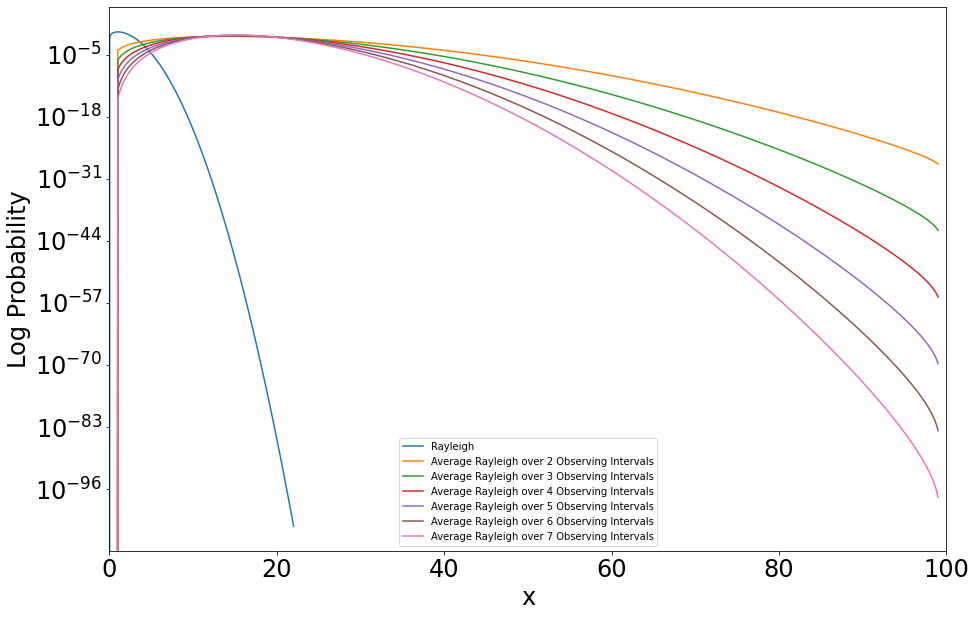

In [8]:
# plot
xs_0_conv_ray_avg_full_domain = np.linspace(0, 22, 1000)
probs_0_conv_ray_avg_full_domain = stats.rayleigh.pdf(xs_0_conv_ray_avg_full_domain)
plt.plot(xs_0_conv_ray_avg_full_domain, probs_0_conv_ray_avg_full_domain, label=f'Rayleigh')
plt.plot(xs_1_conv_ray_avg, probs_1_conv_ray_avg, label=f'Average Rayleigh over 2 Observing Intervals')
plt.plot(xs_2_conv_ray_avg, probs_2_conv_ray_avg, label=f'Average Rayleigh over 3 Observing Intervals')
plt.plot(xs_3_conv_ray_avg, probs_3_conv_ray_avg, label=f'Average Rayleigh over 4 Observing Intervals')
plt.plot(xs_4_conv_ray_avg, probs_4_conv_ray_avg, label=f'Average Rayleigh over 5 Observing Intervals')
plt.plot(xs_5_conv_ray_avg, probs_5_conv_ray_avg, label=f'Average Rayleigh over 6 Observing Intervals')
plt.plot(xs_6_conv_ray_avg, probs_6_conv_ray_avg, label=f'Average Rayleigh over 7 Observing Intervals')

plt.tick_params(labelsize=24)
plt.xlim(0, 100)
plt.yscale('log')
plt.xlabel('x', fontdict={'size':24})
plt.ylabel('Log Probability', fontdict={'size':24})
plt.legend()
plt.show()

Although the Rayleigh appeared to be approaching a Gaussian from the standard plot, now that we've plotted it on a semi-log scale we see that that is indeed not the case.  The Rayleigh distribution is not approaching a Gaussian.  There are two reasons we can draw this conclusion: firstly on the right side of the plot we see that the distribution begins to dip down rather than have the smooth parabolic behavior required to be Gaussian.  Secondly, the Rayleigh distribution cannot go negative which will prevent it from converging to a Gaussian as the Gaussian is defined from negative infinity to infinity - not zero to infinity.

## Problem 3

### Version 1

We were provided an alert from LIGO that as also seen by telescope SWIFT which provides a precise pixel location so an image can be obtained of the sky.  Using SWIFT's image, we would like to determine if the alert corresponds to a discovery.

#### Part A

Suppose that we have an optical telescope to at our disposal.  This optical telescope is pointed out to space which has a background distribution from the CCD which is Gaussian distributed with a width of 1.5 - the distribution for a specific pixel result provided by SWIFT.  We have detected a candidate signal of $6.7$ and we would like ask the following question:

> What is the probability that the background distribution of a Gaussian (width = 1.5) produced a signal that is as signal-like or more than our candidate signal of 6.7?

We can answer this question by evaluating the following integral and then converting back to a sigma:

$$P=\int_{6.7}^{\infty} \frac{1}{\sqrt{2\pi * (1.5)^2}} e^{-x^2/(2(1.5)^2)} dx$$

In [9]:
# define our variables
width = 1.5
canidate = 6.7

# calculate the probability
prob_to_cause_canidate = stats.norm.sf(canidate, scale=width)

# calculate the sigma using the probability
sigma_to_cause_canidate = stats.norm.ppf(prob_to_cause_canidate)
# now we will take the postive value due to symmetry
sigma_to_cause_canidate = abs(sigma_to_cause_canidate)


print(f'For a canidate signal of {canidate} the probability that this signal was')
print(f'caused by the background is {prob_to_cause_canidate} which corresponds to')
print(f'a sigma value of {sigma_to_cause_canidate:.3f}')

For a canidate signal of 6.7 the probability that this signal was
caused by the background is 3.972388603377734e-06 which corresponds to
a sigma value of 4.467


Provided a candidate value of 6.7 we found that the sigma for this event to be caused by the background distribution is $4.467\sigma$ - which corresponds to a probability of $3.972*10^{-6}$.  When comparing this value to the required threshold for discovery which is $5\sigma$ or larger we see that we would not be able to claim a discovery in this situation however we may be able to secure funding to keep looking for our event.

### Version 2

We have received another alert from LIGO however we did not get an event from SWIFT.  Because of this we only know what region of the sky to look in rather than knowing the exact pixel location to look at.  Let's explore classifying this result.

#### Part B

Because we do not know the precise location we will poll 10k pixel locations in the sky for our final distribution.  Polling these 10k pixel locations in the sky we will end up convolving 10k Gaussians of width 1.5 to get the final distribution.  As doing 10k convolutions is computationally expensive we will use an approximation.  Because we are considering a rare event - as we saw previously the probability was $3.972*10^{-6}$ - we can simply multiply the Gaussian by a factor of 10,000.  Following through the convolution we would get a result of $(1-p)^N$ where $p$ is the probability that the background distribution produced the candidate.  As we are considering rare events, $p<<1$ thus we can use the binomial expansion to first order to simplify: $(1-p)^N = 1-Np$.  Because $p=\text{pdf}_{gaus}(x)$ where $x$ is a rare event we can now write the following mathematical formula for the probability density function when we are looking for rare events:

$$10000 \frac{1}{\sqrt{2\pi * (1.5)^2}} e^{-x^2/(2(1.5)^2)}$$

Now that we have our background distribution - a Gaussian centered at 0 with width of 0.015 - we would like to ask the following question about our candidate:

> What is the probability that the background distribution, which is the average of 10k Gaussian distributions of width 1.5, produced a signal as signal-like or more than our candidate signal of 6.7?

#### Part C

We can answer the above question by evaluating the following integral and then converting back to a sigma:

$$P=\int_{6.7}^{\infty} 10000 \frac{1}{\sqrt{2\pi * (1.5)^2}} e^{-x^2/(2(1.5)^2)} dx$$

In [10]:
# define our variables
width_10k = 1.5
canidate = 6.7

# calculate the probability
prob_to_cause_canidate_10k = 10000 * stats.norm.sf(canidate, scale=width_10k)

# calculate the sigma using the probability
sigma_to_cause_canidate_10k = stats.norm.ppf(prob_to_cause_canidate_10k)
# now we will take the postive value due to symmetry
sigma_to_cause_canidate_10k = abs(sigma_to_cause_canidate_10k)

print(f'For a canidate signal of {canidate} the probability that this signal was')
print(f'caused by the background is {prob_to_cause_canidate_10k} which corresponds to')
print(f'a sigma value of {sigma_to_cause_canidate_10k:.3f}')

For a canidate signal of 6.7 the probability that this signal was
caused by the background is 0.03972388603377734 which corresponds to
a sigma value of 1.754


Provided a candidate value of 6.7 we found that the sigma for this event to be caused by the background distribution is $1.754\sigma$ - which corresponds to a probability of $0.03972$.  When comparing this value to the required threshold for discovery which is $5\sigma$ or larger we see that we would not be able to claim a discovery.

Additionally, we see that the significance of our discovery is even worse than before.  This is because previously when we were looking at a rare event we only polled once.  If you look for a rare event many many times you will eventually observe the event.

## Problem 4

In this problem we will explore **trial factors** which is an important effect that considers looking many many times for a rare event.  When you continue to keep looking you will eventually will observe the event.  Let's explore this more.

### Part A

Previously we were considering a Gaussian of with 1.5.  Provided this Gaussian what signal is required in order to have a $5\sigma$ detection?  Specifically we are asking the following question:

> What signal would I have had to observe in order for the background distribution to produce a probability of $5\sigma$ that the background produced that signal?

To do this we will work backwards: begin with $5\sigma$, convert to a probability, then use that probability to determine the $\sigma$ for the distribution.  This final sigma will correspond to exactly the candidate required in order to have a probability of $5\sigma$ for the background distribution to have produced the signal.

In [11]:
# define our distribution variables
width_5_sigma_event = 1.5

# define our initial sigma
sigma = 5

# convert to a probability
prob_5_sigma_event = stats.norm.sf(sigma)

# using that probability determine the canidate value
canidate_5_sigma_event = stats.norm.isf(prob_5_sigma_event, scale=width_5_sigma_event)

# print the results
print(f'We must have a canidate value of {canidate_5_sigma_event:.3f} in order for the background distribution')
print(f'to give a result of 5 sigma for it to produce the canidate.')

We must have a canidate value of 7.500 in order for the background distribution
to give a result of 5 sigma for it to produce the canidate.


From the result above we have found that the signal required for a 5 sigma detection is $7.500$.

### Part B

Lets instead consider the distribution from Version 2 which is 10k Gaussians of width 1.5 convolved together.  Provided this distribution what signal is required in order to have a $5\sigma$ detection?  Specifically we are asking the following question:

> What signal would I have had to observe in order for the background distribution to produce a probability of $5\sigma$ that the background produced that signal?

To determine this value we will do what we did in the previous part and find the candidate from a sigma of 5.

In [12]:
# define our distribution variables
width_5_sigma_event_10k = 1.5

# define our initial sigma
sigma = 5

# convert to a probability
prob_5_sigma_event_10k = stats.norm.sf(sigma)

# using that probability determine the canidate value
canidate_5_sigma_event_10k = stats.norm.isf(prob_5_sigma_event_10k / 10000, scale=width_5_sigma_event_10k)

# print the results
print(f'We must have a canidate value of {canidate_5_sigma_event_10k} in order for the background distribution')
print(f'to give a result of 5 sigma for it to produce the canidate.')

We must have a canidate value of 9.825806419058 in order for the background distribution
to give a result of 5 sigma for it to produce the canidate.


From the result above we have found that the signal required for a 5 sigma detection is $9.826$.

### Part C

From the above results we can found that when we did not know the precise location and had to poll 10k pixels for our event the signal required for a 5 sigma event is $9.826$.  Comparatively, when we know the precise location a 5 sigma event requires a signal of $7.500$ or larger.  Taking a ratio of $9.826 / 7.500 = 1.31$ we find that when we are considering 10k pixels our signal must be 1.31 times brighter in order for us to claim a discovery.

If we refer back to our distribution we see that near the tails we do not have a linear decay, instead we have an exponential decay of the probability.  Thus when we increase the number of times that we look we do increase the probability required for a discovery however the exponential decay significantly lowers the impact of looking over many locations resulting in a low sensitivity penalty for many trials.

#### Part D

Let's observe how our sensitivity penalty and brightness increase ratio change as we increase the number of locations we look at by orders of magnitude.  Let's now look at 1000k locations and see what our signal must be for a 5 sigma event.

In [13]:
# define our distribution variables
width_5_sigma_event_10k = 1.5

# define our initial sigma
sigma = 5

# convert to a probability
prob_5_sigma_event_10k = stats.norm.sf(sigma)

# using that probability determine the canidate value
canidate_5_sigma_event_10k = stats.norm.isf(prob_5_sigma_event_10k / 1000000, scale=width_5_sigma_event_10k)

# print the results
print(f'We must have a canidate value of {canidate_5_sigma_event_10k} in order for the background distribution')
print(f'to give a result of 5 sigma for it to produce the canidate.')

We must have a canidate value of 10.810027865114721 in order for the background distribution
to give a result of 5 sigma for it to produce the canidate.


From the result above we have found that the signal required for a 5 sigma detection is $10.810$.  This signal requires the brightness of the signal to increase by a factor of $10.810 / 7.500 = 1.44$ in order to have a 5 sigma event!  Comparing this to our previous brightness increase requirement we find that we only had to increase the brightness by $1.44-1.31 = 0.13$ in order to have a 5 sigma event even though we looked at 100 times more locations than previously!  If we were to continue to look in more and more pixel locations for a 5 sigma event we would find that as we increase the number of locations polled by orders of magnitude, the brightness required for a 5 sigma event will hardly change.

### Extra Credit

If we had a different distribution instead of a Gaussian we would find that the sensitivity penalty would not change much as we poll many locations.  We can draw this conclusion for two reasons: firstly we know that as we convolve a distribution with itself many many times we converge to a Gaussian thus recovering the behavior we saw in the above problem.  Additionally, because distributions must be normalized they must fall off and approach zero as they go to infinity.  This fall off may not be exponential as it is with the Gaussian however the fall off is on the tails and the tails are the locations of rare events so the result would be that only a slight change in brightness is required in order to have a 5 sigma event.